In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
data = pd.read_csv("historical_data.csv", dtype={
    'Date': 'object',
    'Currency': 'object',
    'Buy': 'float64',
    'Sell': 'float64'
})
df = pd.DataFrame(data)
df.drop('Mean', axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

print(df.head())
print(df.dtypes)

        Date    Currency      Buy     Sell
0 2016-10-11   AE DIRHAM  27.5449  27.6046
1 2016-10-11     SA RAND   7.3087   7.3305
2 2016-10-11       CAN $  76.6060  76.7744
3 2016-10-11   KES / RWF   7.4571   7.5700
4 2016-10-11  KES / TSHS  21.4834  21.6229
Date        datetime64[ns]
Currency            object
Buy                float64
Sell               float64
dtype: object


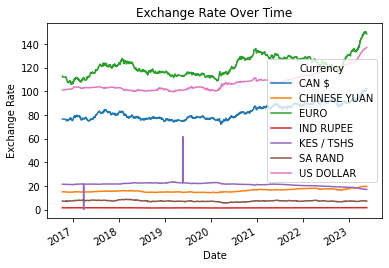

<Figure size 432x216 with 0 Axes>

In [80]:
currency = ['SA RAND', 'US DOLLAR', 'IND RUPEE', 'EURO', 'CHINESE YUAN', 'CAN $', 'KES / TSHS']
currency_df = df[df['Currency'].isin(currency)]
currency_df.set_index('Date', inplace=True)

currency_df = currency_df.groupby(['Date', 'Currency']).mean().reset_index()
pivot_df = currency_df.pivot(index='Date', columns='Currency', values='Buy')




pivot_df.plot()
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Over Time')
#plt.legend()
plt.figure(figsize=(6,3))
plt.show()